In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 39s 3us/step


In [10]:
X_train.shape

(60000, 28, 28)

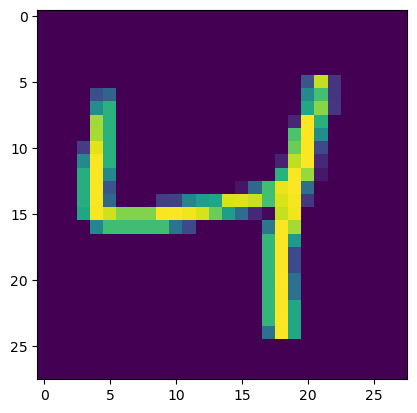

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

convert each one into the 0 and 1 as they are in 255 pixels form.

In [19]:
X_train = X_train/255
X_test =  X_test/255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

now gonna make artificial neural network.

In [42]:
model  = Sequential()
# convert high dimensional arrays into 1D using FLatten
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
# lets add one more hidden layer
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam' , metrics=['accuracy'] )

In [45]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25

1500/1500 [==============================] - 11s 6ms/step - loss: 0.2880 - accuracy: 0.9162 - val_loss: 0.1523 - val_accuracy: 0.9561
Epoch 2/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1218 - accuracy: 0.9640 - val_loss: 0.1213 - val_accuracy: 0.9646
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0823 - accuracy: 0.9755 - val_loss: 0.1144 - val_accuracy: 0.9658
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.0985 - val_accuracy: 0.9719
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.1021 - val_accuracy: 0.9723
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0966 - val_accuracy: 0.9729
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0988 - val_accurac

In [46]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [47]:
y_pred = y_prob.argmax(axis=1)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9728

ways to improve the accuracy 
1- change the architecture or add more layers or increase the 
number of images or increase the epochs for training.

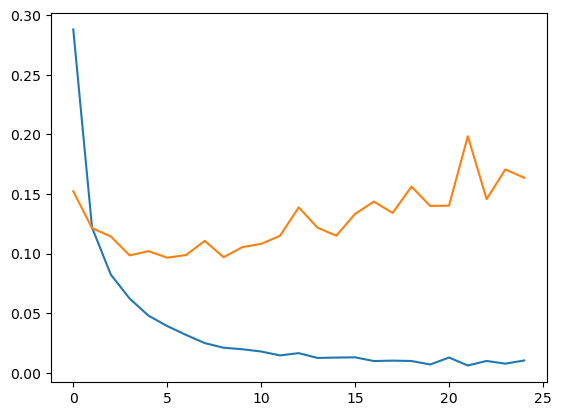

In [49]:
# checking the factors affecting accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

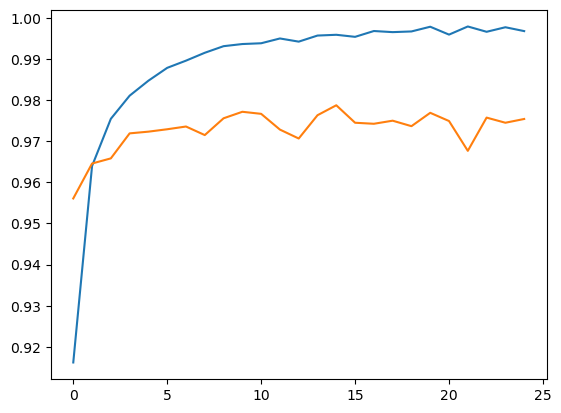

In [50]:
 # checking the factors affecting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

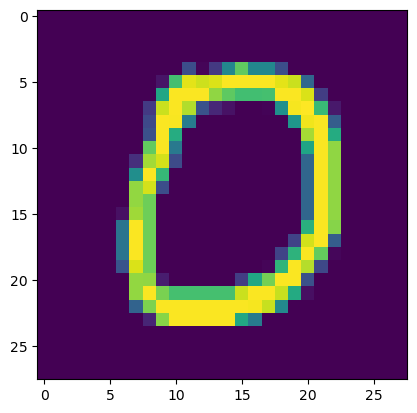

In [57]:
plt.imshow(X_test[10])

In [58]:
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([0], dtype=int64)